<a href="https://colab.research.google.com/github/AshokPavi/Iris/blob/main/another_copy_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=8, validation_split=0.1)


Epoch 1/50
14/14 [==============================] - 1s 23ms/step - loss: 0.9048 - accuracy: 0.7593 - val_loss: 0.8530 - val_accuracy: 0.6667
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.7963 - val_loss: 0.7184 - val_accuracy: 0.6667
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.5458 - accuracy: 0.8056 - val_loss: 0.6225 - val_accuracy: 0.6667
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 0.4532 - accuracy: 0.8148 - val_loss: 0.5560 - val_accuracy: 0.8333
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.3953 - accuracy: 0.8148 - val_loss: 0.5182 - val_accuracy: 0.8333
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.3545 - accuracy: 0.8241 - val_loss: 0.4814 - val_accuracy: 0.8333
Epoch 7/50
14/14 [==============================] - 0s 6ms/step - loss: 0.3277 - accuracy: 0.8333 - val_loss: 0.4585 - val_accuracy: 0.9167
Epoch 8/50
14/14 [=

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 0s 52ms/step - loss: 0.0459 - accuracy: 1.0000
Test Loss: 0.04589543491601944
Test Accuracy: 1.0


In [ ]:
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 146ms/step


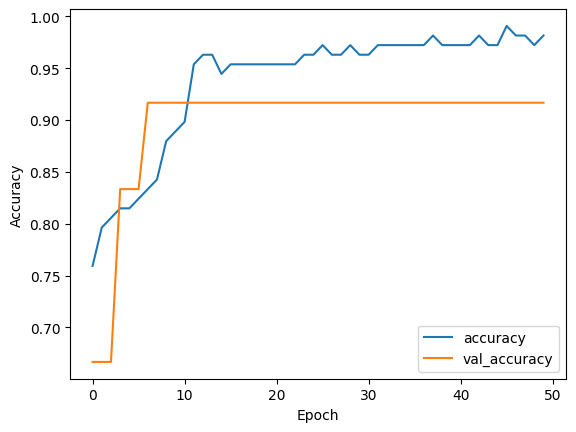

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
